# Example Scenario #

A runaway freight train sped down the hill... before the brakes were applied. The Train Operating Company would like to know if the braking distance complied to Railway Group Standards. 
Calculate the stopping distance of the train (equivalent for level track), and plot this data point on the GMRT2043 (Appendix A) curve V to show it does not exceed the maximum allowed braking distance.

https://www.rssb.co.uk/rgs/standards/GMRT2045%20Iss%204.pdf


# Data obtained from Onboard Train Monitoring Recorder: #

In [3]:
SPEED_1 = 82 # speed at start of brake application (km/h)
SPEED_2 = 0 # speed at end of brake application (km/h)
TIME_1 = 0
TIME_2 = 34
DISTANCE_1 = 3295120 # distance at start of brake application (m)
DISTANCE_2 = 3295665 # distance at end of brake application (m)
GRADIENT = 1/75

# Curve V data defined in GMRT2043 Appendix A
CURVEV_INITIAL_SPEED = [20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70] # units: mph
CURVEV_DISTANCE = [195, 281, 401, 532, 669, 829, 916, 990, 1058, 1116, 1218] # units: metres

# Step 1 - Calculate acceleration due to gravity

![Free Body Diagram](fbd.png)

In [4]:
import math
slopeangle = math.atan(GRADIENT)
acceleration_due_to_g = 9.81*(math.sin(slopeangle))

# Step 2 - Calculate the average deleration on the slope

From equations of motion, solving for a (acceleration)

$$v^2 = u^2 + 2as$$

$$v^2 - u^2 = 2as$$

$$a = \frac{v^2 - u^2}{2s}$$

In [5]:
deceleration_slope = (((SPEED_2/3.6)**2) - (SPEED_1/3.6)**2)/(2*(DISTANCE_2-DISTANCE_1))
print(deceleration_slope)

-0.4759882206365388


# Step 3 - Calculate equivalent deceleration on level track #

In [6]:
deceleration_on_level = deceleration_slope - acceleration_due_to_g
print(deceleration_on_level)

-0.6067765955198647


# Step 4 - Calculate stopping distance #
From equations of motion:

$$s=\frac{v^2-u^2}{2a}$$


In [7]:
stopping_distance = (((SPEED_2/3.6)**2) - (SPEED_1/3.6)**2)/(2*deceleration_on_level)
print(stopping_distance)

427.5273340506109


# Step 5 - Plot Curve V from GMRT2043 (Appendix A) and calculated braking distance #

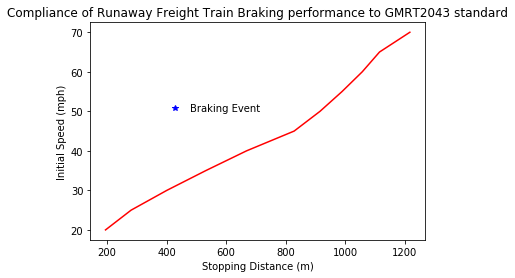

In [9]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

plt.plot(CURVEV_DISTANCE, CURVEV_INITIAL_SPEED, 'r')
plt.plot(stopping_distance, SPEED_1 / 1.61, 'b*')
plt.xlabel('Stopping Distance (m)')
plt.ylabel('Initial Speed (mph)')
plt.title('Compliance of Runaway Freight Train Braking performance to GMRT2043 standard')
plt.text(480, 50, 'Braking Event')
plt.show()

